In [396]:
# 我们着重讨论不同区域的显著性影响因素
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [397]:
data = pd.read_csv("C:/Users/86187/Desktop/新加坡国立大学暑期学校相关文件/data_cleaned.csv")
data.describe()

,Lng,Lat,Cid,DOM,followers,price,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingStructure,ladderRatio,elevator,subway,district,communityAverage,tradeTimeModefiy,Original_price,Original_followers,attractiveness
count,297597.000000,297597.000000,2.975970e+05,152184.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,...,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000
mean,116.418767,39.949761,1.126275e+12,29.469701,0.015039,0.391045,2.011102,1.171107,0.995131,1.182351,...,4.421473,0.381856,0.570624,0.602388,6.748516,63696.710585,735621.421896,42715.008611,17.189713,15.657991
std,0.110999,0.091533,1.331619e+12,50.394467,0.030417,0.178332,0.764922,0.512581,0.100335,0.423099,...,1.907456,0.176411,0.494988,0.489405,2.811945,22153.499402,597.390522,19476.512214,34.766471,38.740741
min,116.072514,39.627030,1.111030e+12,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.014000,0.000000,0.000000,1.000000,10847.000000,734046.000000,7.000000,0.000000,1.000000
25%,116.345863,39.893200,1.111030e+12,1.000000,0.000000,0.258747,1.000000,1.000000,1.000000,1.000000,...,2.000000,0.250000,0.000000,0.000000,6.000000,46505.000000,735124.000000,28266.000000,0.000000,1.004586
50%,116.416780,39.934530,1.111030e+12,7.000000,0.004374,0.357607,2.000000,1.000000,1.000000,1.000000,...,6.000000,0.333000,1.000000,1.000000,7.000000,59025.000000,735769.000000,39063.000000,5.000000,1.051340
75%,116.476921,40.003156,1.111030e+12,38.000000,0.016623,0.485556,2.000000,1.000000,1.000000,1.000000,...,6.000000,0.500000,1.000000,1.000000,8.000000,75858.000000,736091.000000,53037.000000,19.000000,8.000000
max,116.711337,40.252758,1.184870e+14,1677.000000,1.000000,1.000000,8.000000,5.000000,3.000000,7.000000,...,6.000000,5.000000,1.000000,1.000000,13.000000,183109.000000,736628.000000,109222.000000,1143.000000,1677.000000


In [398]:
data.shape

(297597, 25)

In [399]:
data['totalRoom'] = data['livingRoom'] + data['drawingRoom'] + data['kitchen'] + data['bathRoom']
data['houseAge'] = data['tradeTimeModefiy']//365 - data['constructionTime']
data['houseCondition'] = data['renovationCondition'] + data['subway'] + data['elevator'] 

In [400]:
import folium
# 创建地图对象，设置初始位置和缩放级别
m = folium.Map(location=[39.906217, 116.3912757], zoom_start=13)
# 在地图上添加一个标记点
folium.Marker([39.906217, 116.3912757], popup='Beijing').add_to(m)
display(m)

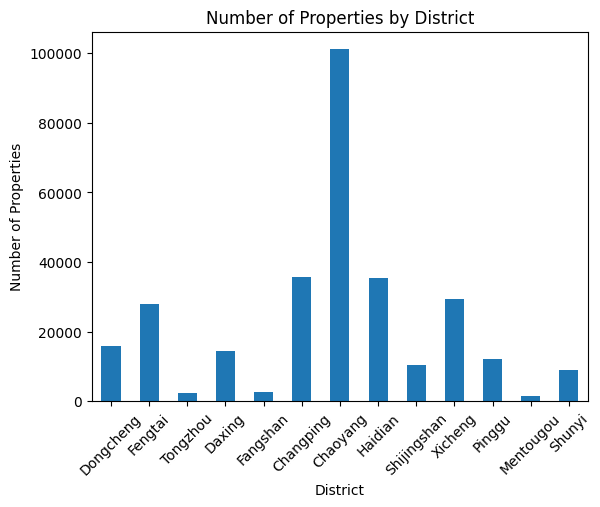

In [401]:
# 对district进行分组并计算每个区域的样本个数
district_counts = data.groupby('district').size()
# 绘制柱状图
district_counts.plot(kind='bar')

plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by District')
plt.xticks(range(len(district_counts)), ['Dongcheng', 'Fengtai', 'Tongzhou', 'Daxing', 'Fangshan', 'Changping', 'Chaoyang', 'Haidian', 'Shijingshan', 'Xicheng', 'Pinggu', 'Mentougou', 'Shunyi'], rotation=45)
plt.show()

In [402]:
# 我们分区块研究影响房价的显著因素
# 东城区
from folium.plugins import MarkerCluster
Dongcheng_data = data[data['district'] == 1]
map_center = [Dongcheng_data.iloc[0]['Lat'], Dongcheng_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 创建一个 MarkerCluster 对象
marker_cluster = MarkerCluster().add_to(m)
# 遍历为每个点添加标记到 MarkerCluster 中，而不是直接添加到地图上
for index, row in Dongcheng_data.iterrows():
    folium.Marker([row['Lat'], row['Lng']]).add_to(marker_cluster)
display(m)

In [ ]:
from folium.plugins import HeatMap
# 东城区
# 我们先观察房屋价格在地理空间中的分布情况
map_center = [Dongcheng_data.iloc[0]['Lat']-0.03, Dongcheng_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 权重设置为每个点的price
heat_data = [[row['Lat'], row['Lng'], row['attractiveness']] for index, row in Dongcheng_data.iterrows()]
# 创建热度图并添加到地图上，使用price作为权重
HeatMap(heat_data,blur=4, radius=8).add_to(m)
m

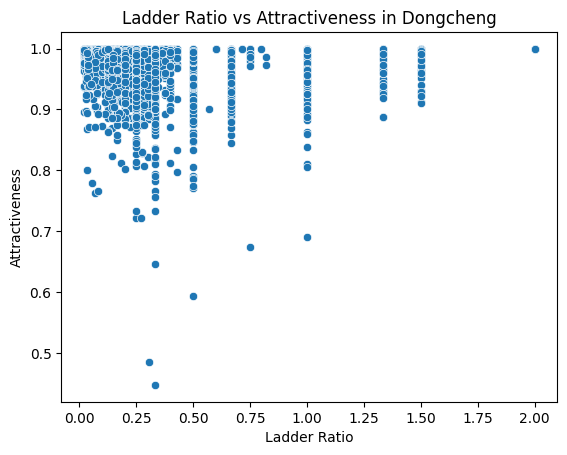

In [ ]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
import seaborn as sns
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Dongcheng_data, x='ladderRatio', y='attractiveness')
plt.title('Ladder Ratio vs Attractiveness in Dongcheng')
plt.xlabel('Ladder Ratio')
plt.ylabel('Attractiveness')
plt.show()

In [ ]:
# 计算ladderRatio和attractiveness之间的相关系数
correlation_matrix = Dongcheng_data[['ladderRatio', 'attractiveness']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 从相关系数的角度看一般条件下ladderRatio在东城区不是一个显著影响房屋吸引力的因素

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.023692
attractiveness    -0.023692        1.000000


In [ ]:
# 我们再观察东城区的房价与楼层高度的关系
high_floor = Dongcheng_data[Dongcheng_data['floor'] > 10]
low_floor = Dongcheng_data[Dongcheng_data['floor'] <= 10]
print("东城区高层建筑共{high_floor}个，低层建筑共{low_floor}个,高层建筑占比为{high_floor_ratio:.2f}%".format(high_floor=len(high_floor), low_floor=len(low_floor), high_floor_ratio=len(high_floor)/len(Dongcheng_data)*100))

东城区高层建筑共8286个，低层建筑共7677个,高层建筑占比为51.91%


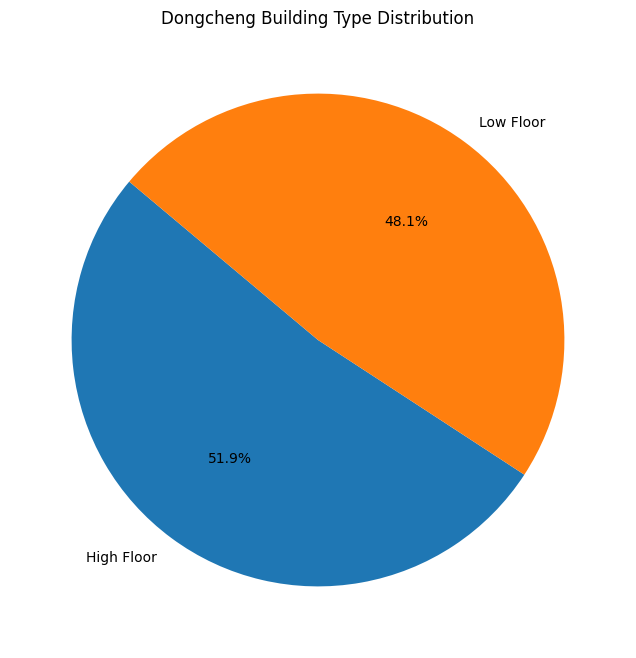

In [ ]:
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie([len(high_floor), len(low_floor)], labels=['High Floor', 'Low Floor'], autopct='%1.1f%%', startangle=140)
plt.title('Dongcheng Building Type Distribution')
plt.show()

In [ ]:
# 计算floor和attractivness之间的相关系数
correlation_matrix = Dongcheng_data[['floor', 'attractiveness']].corr()
print(correlation_matrix)

                   floor  attractiveness
floor           1.000000       -0.005122
attractiveness -0.005122        1.000000


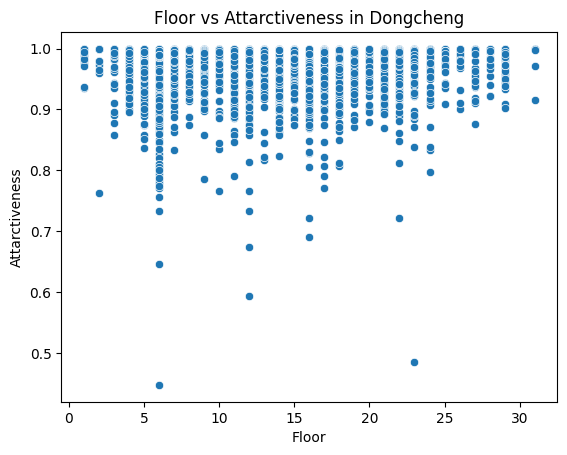

In [ ]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Dongcheng_data, x='floor', y='attractiveness')
plt.title('Floor vs Attarctiveness in Dongcheng')
plt.xlabel('Floor')
plt.ylabel('Attarctiveness')
plt.show()

In [ ]:
# 发现在东城区中整体上floor和房屋的受欢迎程度没有关联
# 计算在高层条件下ladderRatio和attractiveness之间的相关系数
correlation_matrix = high_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.034737
attractiveness    -0.034737        1.000000


In [ ]:
correlation_matrix = low_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)
# 对于低层建筑, ladderRatio和attractiveness之间的关联性相较于高层建筑要更弱,虽然面对高层建筑时人们会考虑人均楼梯数目但总体来说不显著

                ladderRatio  attractiveness
ladderRatio        1.000000       -0.005523
attractiveness    -0.005523        1.000000


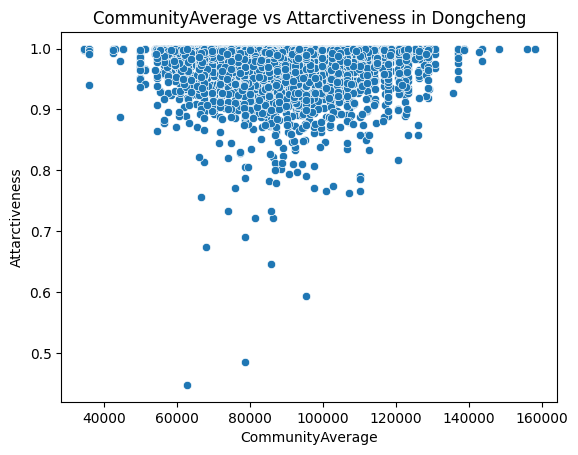

In [ ]:
sns.scatterplot(data=Dongcheng_data, x='communityAverage', y='attractiveness')
plt.title('CommunityAverage vs Attarctiveness in Dongcheng')
plt.xlabel('CommunityAverage')
plt.ylabel('Attarctiveness')
plt.show()

In [ ]:
# 研究communityAverage与attractiveness之间的关联度
correlation_matrix = Dongcheng_data[['communityAverage', 'attractiveness']].corr()
print(correlation_matrix)

                  communityAverage  attractiveness
communityAverage          1.000000       -0.000548
attractiveness           -0.000548        1.000000


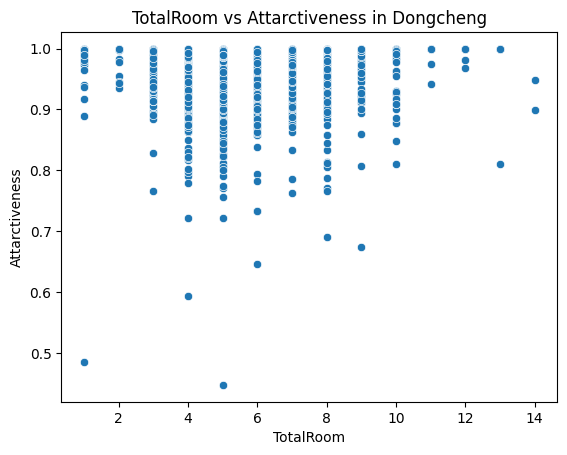

In [ ]:
sns.scatterplot(data=Dongcheng_data, x='totalRoom', y='attractiveness')
plt.title('TotalRoom vs Attarctiveness in Dongcheng')
plt.xlabel('TotalRoom')
plt.ylabel('Attarctiveness')
plt.show()

In [ ]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Dongcheng_data[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000       -0.046636
attractiveness  -0.046636        1.000000


In [ ]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Dongcheng_data[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000       -0.046636
attractiveness  -0.046636        1.000000


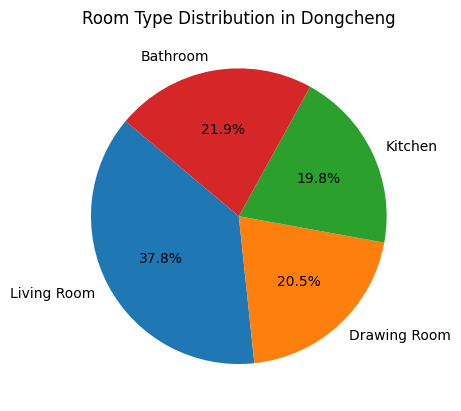

In [ ]:
# 分别计算每种房间的总数
total_livingRoom = Dongcheng_data['livingRoom'].sum()
total_drawingRoom = Dongcheng_data['drawingRoom'].sum()
total_kitchen = Dongcheng_data['kitchen'].sum()
total_bathroom = Dongcheng_data['bathRoom'].sum()
# 将计算结果合并为一个新的Series
room_totals = pd.Series({
    'Living Room': total_livingRoom,
    'Drawing Room': total_drawingRoom,
    'Kitchen': total_kitchen,
    'Bathroom': total_bathroom
})
room_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution in Dongcheng')
plt.ylabel('')
plt.show()

In [ ]:
# 我们从一般的角度出发研究房间类型对吸引力的影响
correlation_matrix = Dongcheng_data[['bathRoom','kitchen','drawingRoom','livingRoom' ,'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  livingRoom  attractiveness
bathRoom        1.000000  0.206071     0.493859    0.423999       -0.049472
kitchen         0.206071  1.000000     0.167915    0.103960        0.018304
drawingRoom     0.493859  0.167915     1.000000    0.389559       -0.020738
livingRoom      0.423999  0.103960     0.389559    1.000000       -0.044588
attractiveness -0.049472  0.018304    -0.020738   -0.044588        1.000000


In [ ]:
big_family = Dongcheng_data[Dongcheng_data['livingRoom'] >= 3]
# 我们再进一步研究大的家庭对不同种类房间的需求
correlation_matrix = big_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.075476     0.621126       -0.062557
kitchen         0.075476  1.000000     0.093153        0.029093
drawingRoom     0.621126  0.093153     1.000000       -0.020936
attractiveness -0.062557  0.029093    -0.020936        1.000000


In [ ]:
small_family = Dongcheng_data[Dongcheng_data['livingRoom'] < 3]
correlation_matrix = small_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.310937     0.322709       -0.018203
kitchen         0.310937  1.000000     0.183950        0.017974
drawingRoom     0.322709  0.183950     1.000000       -0.003931
attractiveness -0.018203  0.017974    -0.003931        1.000000


In [ ]:
# 交易时房龄对吸引力的影响
correlation_matrix = Dongcheng_data[['constructionTime','houseAge','attractiveness']].corr()
print(correlation_matrix)

                  constructionTime  houseAge  attractiveness
constructionTime          1.000000 -0.986445       -0.008346
houseAge                 -0.986445  1.000000       -0.054024
attractiveness           -0.008346 -0.054024        1.000000


In [ ]:
correlation_matrix = Dongcheng_data[['houseCondition','houseAge','constructionTime','attractiveness']].corr()
print(correlation_matrix)

                  houseCondition  houseAge  constructionTime  attractiveness
houseCondition          1.000000 -0.182610          0.276602       -0.195743
houseAge               -0.182610  1.000000         -0.986445       -0.054024
constructionTime        0.276602 -0.986445          1.000000       -0.008346
attractiveness         -0.195743 -0.054024         -0.008346        1.000000


In [ ]:
correlation_matrix = high_floor[['elevator','attractiveness']].corr()
print(correlation_matrix)

                elevator  attractiveness
elevator          1.0000          0.0013
attractiveness    0.0013          1.0000


C:\Users\86187\AppData\Local\Temp\ipykernel_18372\1398381951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dongcheng_data['buildingType'] = Dongcheng_data['buildingType'].map(type_mapping)


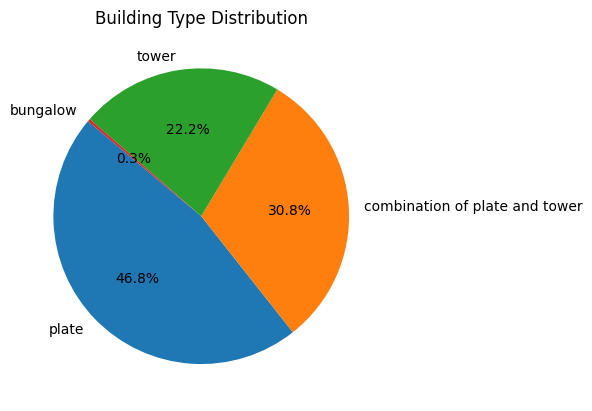

In [ ]:
type_mapping = {
    1: 'tower',
    2: 'bungalow',
    3: 'combination of plate and tower',
    4: 'plate'
}
Dongcheng_data['buildingType'] = Dongcheng_data['buildingType'].map(type_mapping)
building_type_counts = Dongcheng_data['buildingType'].value_counts()
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Type Distribution')
plt.ylabel('')
plt.show()

buildingType
bungalow                          0.994283
combination of plate and tower    0.989943
plate                             0.989802
tower                             0.989567
Name: attractiveness, dtype: float64


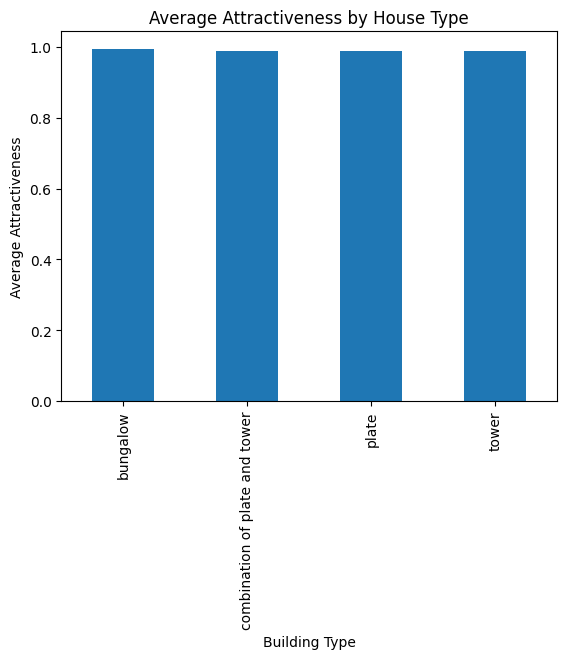

In [ ]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Dongcheng_data.groupby('buildingType')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by House Type')
plt.xlabel('Building Type')
plt.ylabel('Average Attractiveness')
plt.show()

In [ ]:
Dongcheng_data= Dongcheng_data[Dongcheng_data['buildingStructure']!=1]
Dongcheng_data['buildingStructure']

67        6
81        2
92        6
94        2
133       6
         ..
297485    6
297508    6
297512    2
297576    2
297585    6
Name: buildingStructure, Length: 15962, dtype: int64

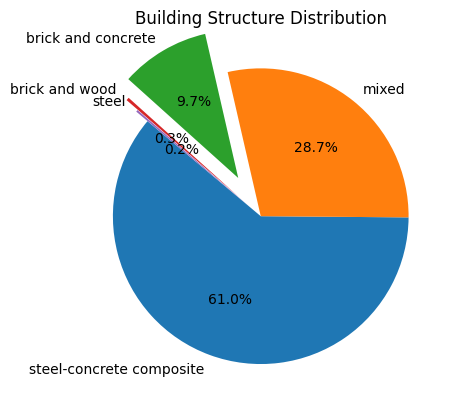

In [ ]:
type_mapping = {
    2:"mixed",
    3:"brick and wood", 
    4:"brick and concrete", 
    5:"steel", 
    6:"steel-concrete composite"
}
Dongcheng_data['buildingStructure'] = Dongcheng_data['buildingStructure'].map(type_mapping)
building_type_counts = Dongcheng_data['buildingStructure'].value_counts()
explode_values = (0, 0, 0.3, 0.2, 0.1)
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode_values)
plt.title('Building Structure Distribution')
plt.ylabel('')
plt.show()

buildingStructure
steel                       0.993357
brick and wood              0.992803
brick and concrete          0.992059
steel-concrete composite    0.989772
mixed                       0.989073
Name: attractiveness, dtype: float64


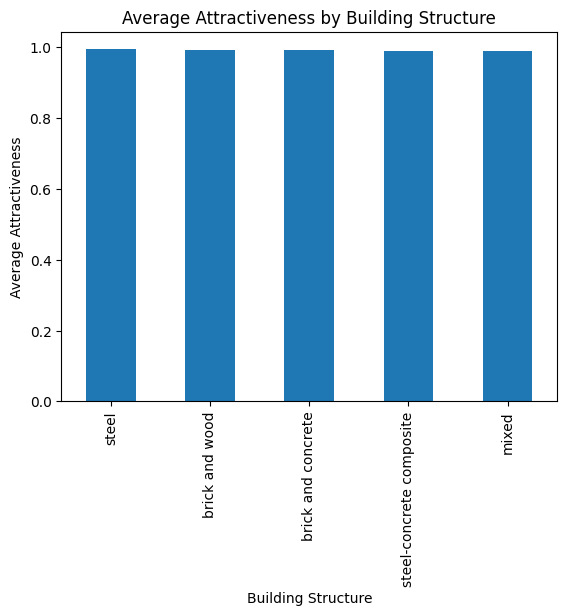

In [ ]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Dongcheng_data.groupby('buildingStructure')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by Building Structure')
plt.xlabel('Building Structure')
plt.ylabel('Average Attractiveness')
plt.show()